<a href="https://colab.research.google.com/github/SaashaJoshi/raman-spetroscopy-chemical-detection/blob/master/derivative_spectroscopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.misc

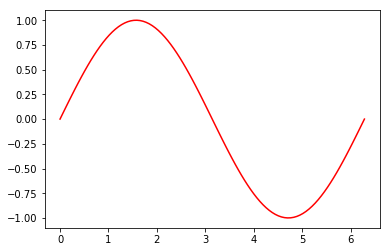

In [228]:
x=np.linspace(0, 2*np.pi, 100)
y=np.sin(x)
plt.plot(x, y)
plt.show()

In [0]:
dy = np.zeros(y.shape,np.float)
dy[0:-1] = np.diff(y)/np.diff(x)
dy[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

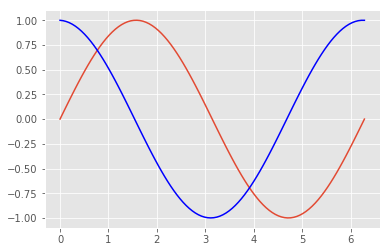

In [230]:
with plt.style.context(('ggplot')):
  plt.plot(x, y)
  plt.plot(x, dy, color='blue')
  plt.show()

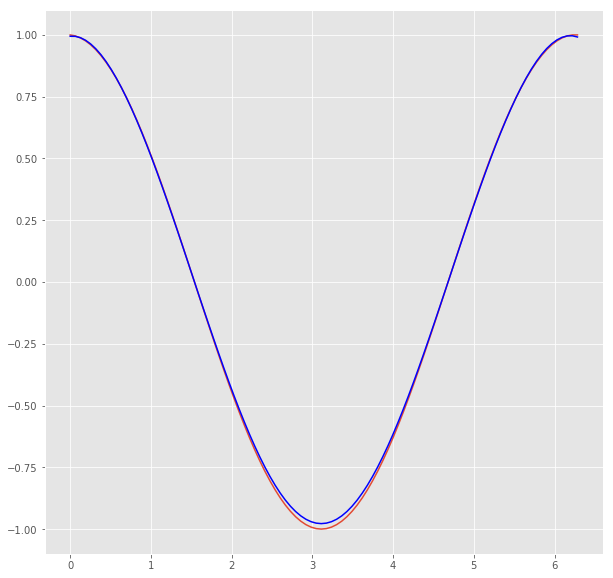

In [238]:
dy_hat=scipy.signal.savgol_filter(dy, 51, 3)

with plt.style.context(('ggplot')):
  plt.plot(x, dy)
  plt.plot(x, dy_hat, color='blue')
  plt.show()

In [136]:
from google.colab import files
uploaded = files.upload()

Saving Actinolite.txt to Actinolite (1).txt


In [0]:
df=pd.read_csv('Actinolite.txt', header=None)
df.columns=['w', 'i']

In [0]:
w=df.iloc[:, :-1]    # Raman Shift
i=df.iloc[:, -1]     # Intensity
w_vector=[rows.w for index, rows in df.iterrows()]
i_vector=[rows.i for index, rows in df.iterrows()]

In [0]:
di = np.zeros(len(i_vector),np.float)
di[0:-1] = np.diff(i_vector)/np.diff(w_vector)
di[-1] = (i_vector[-1] - i_vector[-2])/(w_vector[-1] - w_vector[-2])

In [240]:
print(plt.rcParams.get('figure.figsize'))

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

[6.0, 4.0]


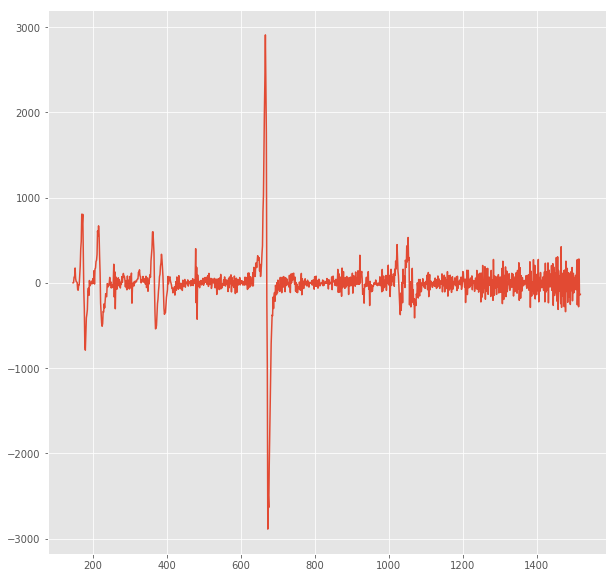

In [249]:
with plt.style.context(('ggplot')):
  #plt.plot(w, i, color='blue')
  plt.plot(w, di)
  plt.show()

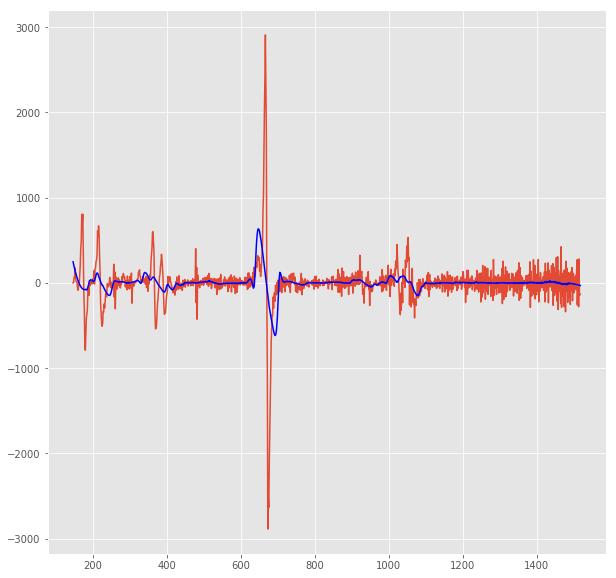

In [254]:
di_hat=scipy.signal.savgol_filter(di, 51, 2)

with plt.style.context(('ggplot')):
  plt.plot(w, di)
  plt.plot(w, di_hat, color='blue')
  plt.show()